In [129]:
import seaborn as sns
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [130]:
url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv'
df=pd.read_csv(url)


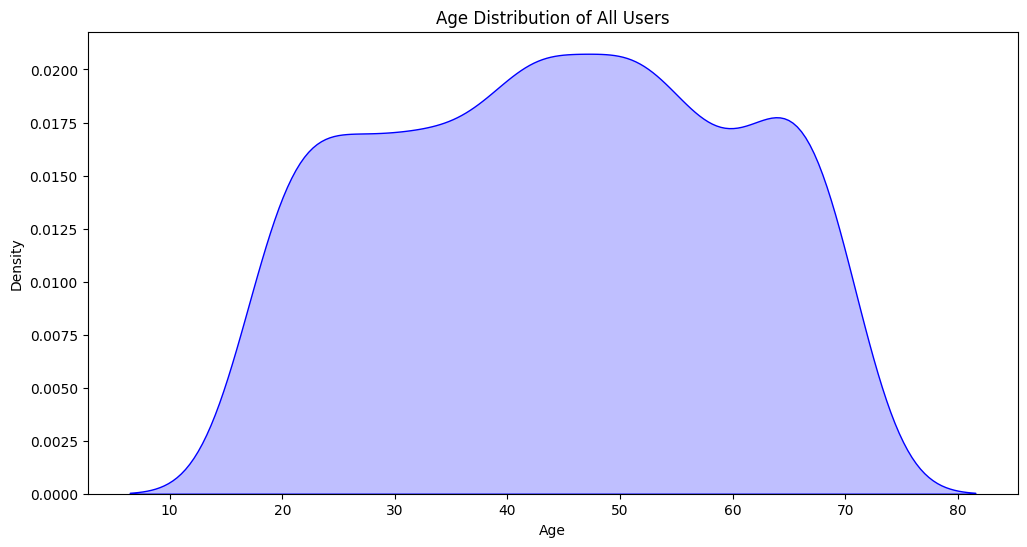

In [131]:
#1.Age aspect
#Age distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Age'], fill=True, color='blue')
plt.title('Age Distribution of All Users')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
#the majority of users are concentrated in the 35-45 age range, indicating a higher proportion of middle-aged users.


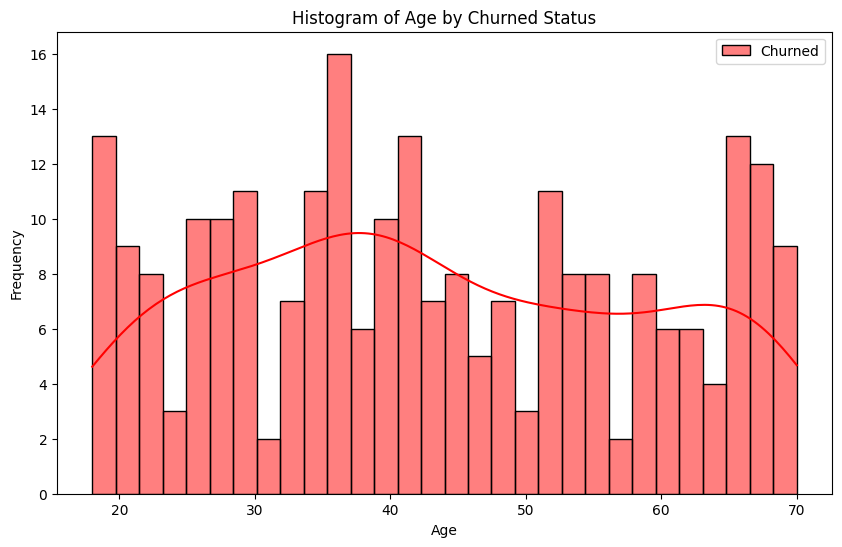

In [132]:
#Age by churned
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churned'] == 1]['Age'], kde=True, color='red', label='Churned', bins=30)
plt.title('Histogram of Age by Churned Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#the highest number of churned users are around 37 years old, followed by those who are 18, 43, and 67 years old

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\211299401.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='churned_percentage', data=churned_percentage_df, palette='viridis')


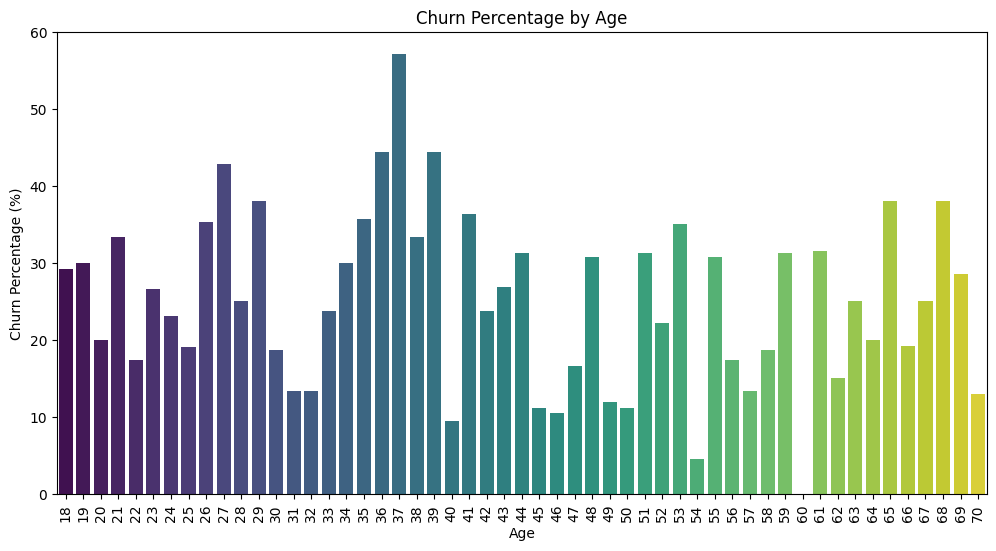

In [133]:

churned_counts = df[df['Churned'] == 1]['Age'].value_counts().sort_index()
total_counts = df['Age'].value_counts().sort_index()

#Calculate the churn percentage of customers of each age group
churned_percentage = (churned_counts / total_counts) * 100


churned_percentage_df = churned_percentage.reset_index()
churned_percentage_df.columns = ['Age', 'churned_percentage']

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='churned_percentage', data=churned_percentage_df, palette='viridis')
plt.title('Churn Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Churn Percentage (%)')
plt.xticks(rotation=90)
plt.show()

#the churn percentage among 37-year-olds is close to 60%, and the 36- and 39-year-old age groups also have about 45% churn. 
#This shows that middle-aged users are losing a lot, 
#and they are the largest group of users. To seize the middle-aged users Users are important


C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\190680729.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite_Genre', y='count', data=content_type_df, palette='viridis')


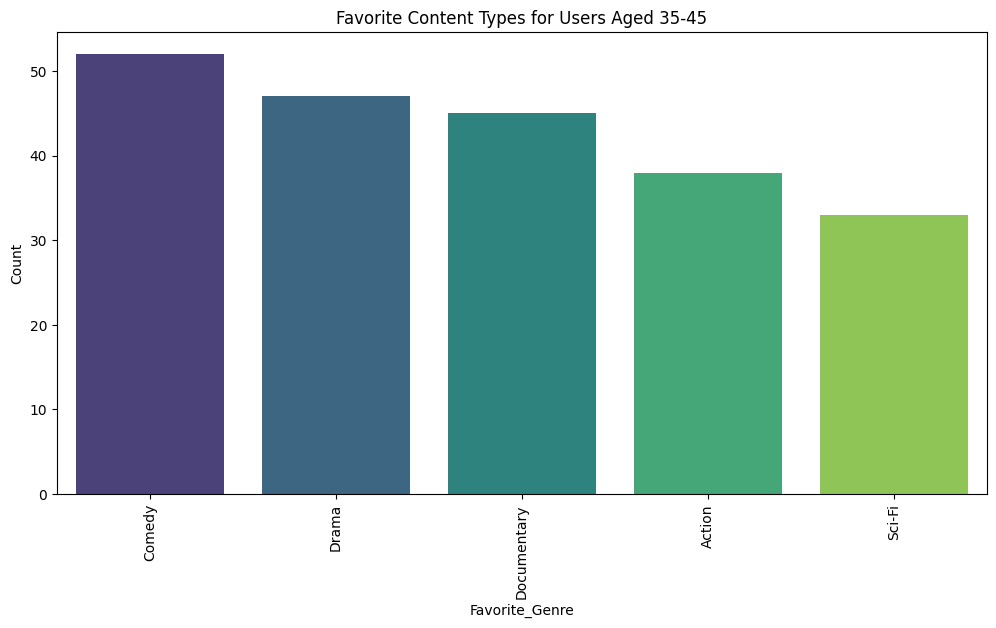

In [134]:
#Filter out the content types that 35-45 year olds like
age_filtered_df = df[(df['Age'] >= 35) & (df['Age'] <= 45)]

content_type_counts = age_filtered_df['Favorite_Genre'].value_counts()


content_type_df = pd.DataFrame({'count': content_type_counts}).reset_index()
content_type_df.columns = ['Favorite_Genre', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Favorite_Genre', y='count', data=content_type_df, palette='viridis')
plt.title('Favorite Content Types for Users Aged 35-45')
plt.xlabel('Favorite_Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
#People of this age group like comedy the most. Need to strengthen the content of comedy.



C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\4082611287.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite_Genre', y='churned_ratio', data=churned_ratio_df, palette='viridis')


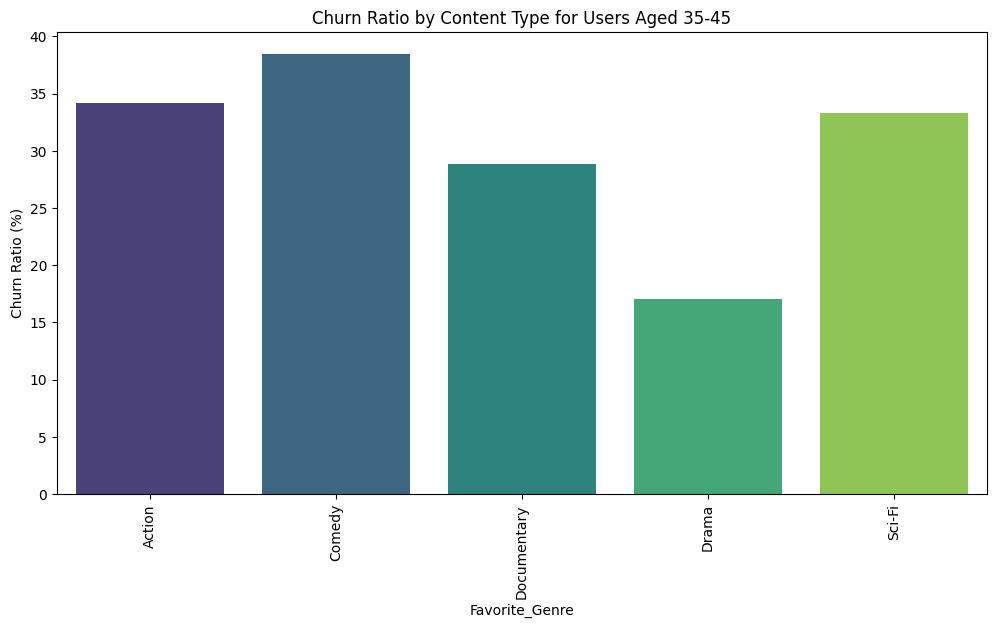

In [135]:
#Check the types of content that 35-45 year olds unsubscribe from

content_type_total_counts = age_filtered_df['Favorite_Genre'].value_counts()
content_type_churned_counts = age_filtered_df[age_filtered_df['Churned'] == 1]['Favorite_Genre'].value_counts()
churned_ratio = (content_type_churned_counts / content_type_total_counts) * 100

churned_ratio_df = churned_ratio.reset_index()
churned_ratio_df.columns = ['Favorite_Genre', 'churned_ratio']

plt.figure(figsize=(12, 6))
sns.barplot(x='Favorite_Genre', y='churned_ratio', data=churned_ratio_df, palette='viridis')
plt.title('Churn Ratio by Content Type for Users Aged 35-45')
plt.xlabel('Favorite_Genre')
plt.ylabel('Churn Ratio (%)')
plt.xticks(rotation=90)
plt.show()

#Among those who unsubscribe, comedy loses the most. We need to improve the quality of comedy.



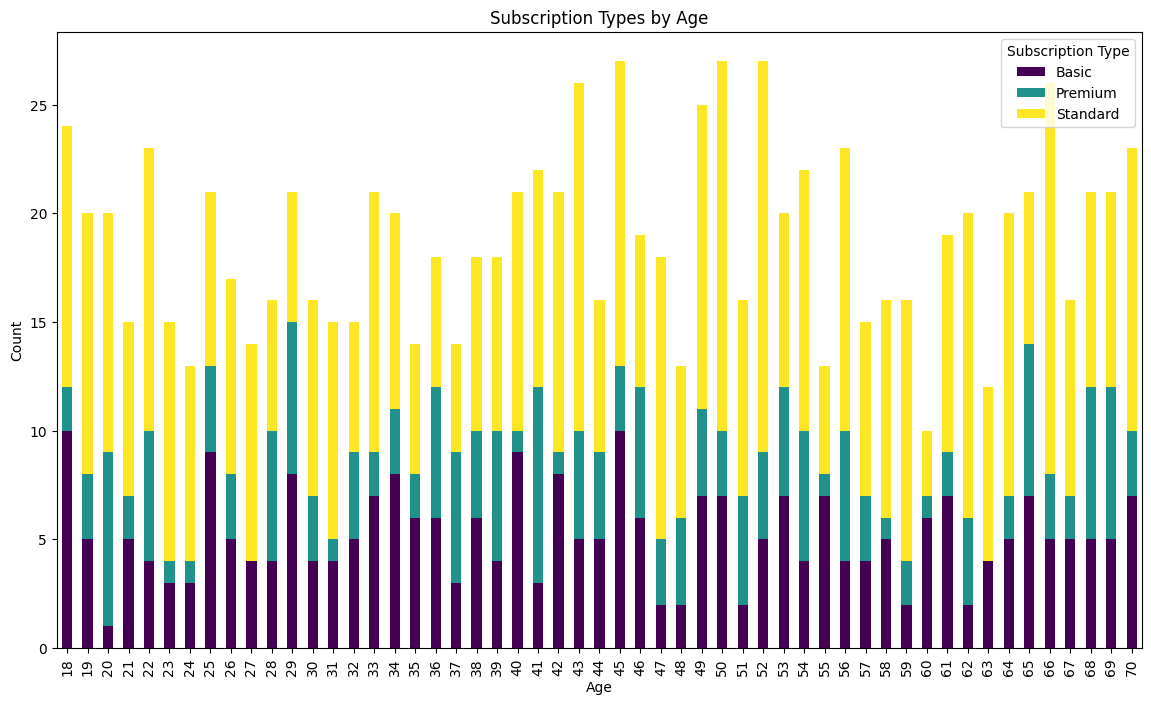

In [136]:
#Age and subscription type
age_subscription_counts = df.groupby(['Age', 'Subscription_Type']).size().unstack(fill_value=0)

age_subscription_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Subscription Types by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Subscription Type')
plt.xticks(rotation=90)
plt.show()

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\350486977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_counts.index, y=premium_counts.values, palette='viridis')


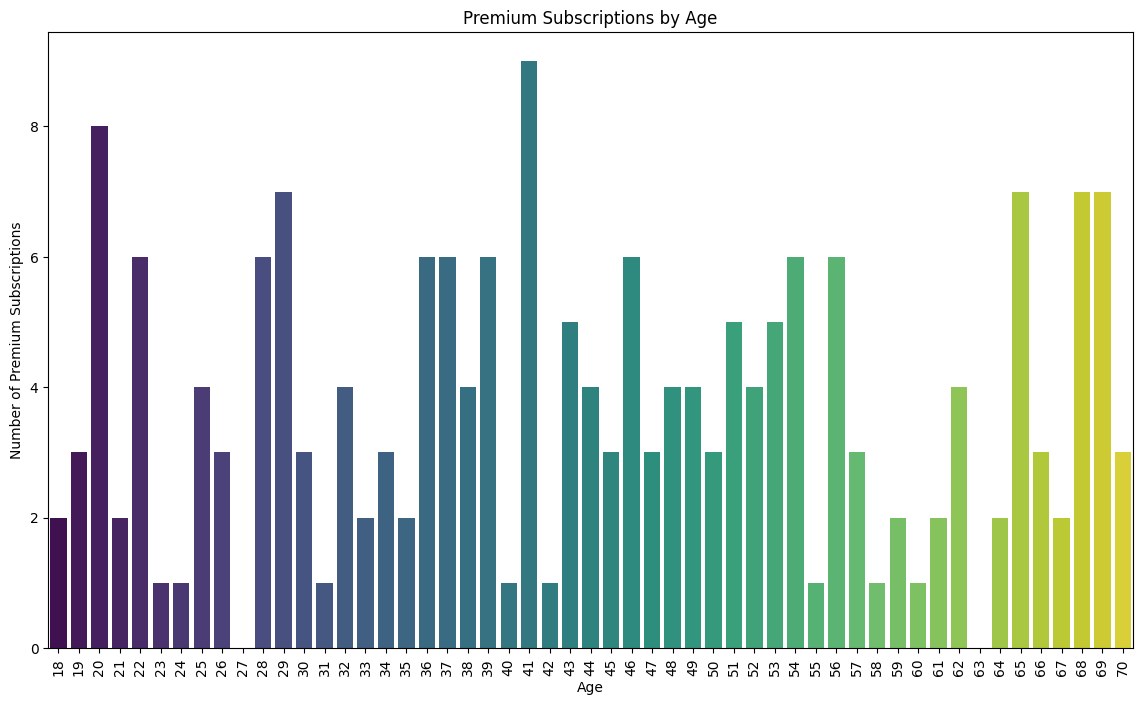

In [137]:
age_subscription_counts = df.groupby(['Age', 'Subscription_Type']).size().unstack(fill_value=0)
if 'Premium' in age_subscription_counts.columns:
    premium_counts = age_subscription_counts['Premium']
max_premium_age = premium_counts.idxmax()
max_premium_count = premium_counts.max()

plt.figure(figsize=(14, 8))
sns.barplot(x=premium_counts.index, y=premium_counts.values, palette='viridis')
plt.title('Premium Subscriptions by Age')
plt.xlabel('Age')
plt.ylabel('Number of Premium Subscriptions')
plt.xticks(rotation=90)
plt.show()
#For the young user group, many people aged 18-35 buy premium. Can pay attention to their needs. 
#middle-aged people aged 41 and above buy the most, which is the most important and top priority.

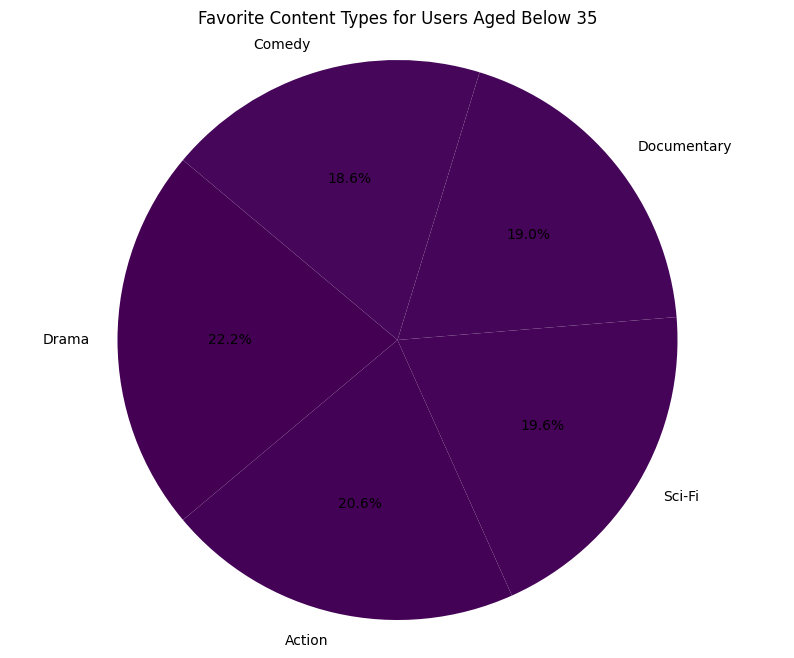

In [138]:
#Types of content that young people like
# Filter out users under 35 years old
young_users_df = df[df['Age'] < 35]

# Check the types of content that users under 35 years old like
content_type_counts = young_users_df['Favorite_Genre'].value_counts()
content_type_df = pd.DataFrame({'count': content_type_counts}).reset_index()
content_type_df.columns = ['Favorite_Genre', 'count']

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(content_type_df['count'], labels=content_type_df['Favorite_Genre'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(content_type_df))))
plt.title('Favorite Content Types for Users Aged Below 35')
plt.axis('equal') 
plt.show()

#Young People like Drama

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\4253919462.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='Monthly_Hours_Watched', data=df, palette='viridis')


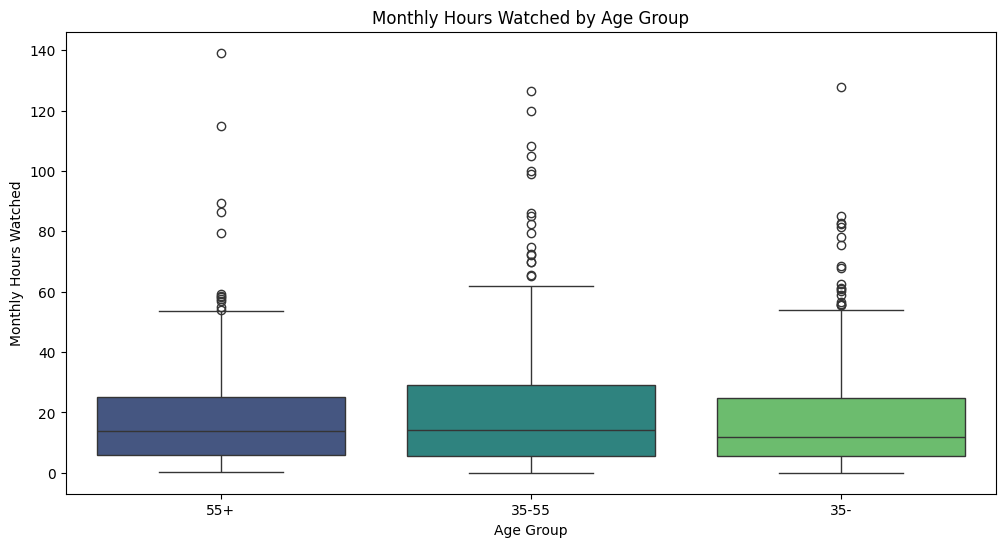

In [139]:
#Box plot of watching time by age group
#<35；35-55 >55

def age_group(Age):
        if Age < 35:
            return '35-'
        elif 35 <= Age < 55:
            return '35-55'
        elif Age >= 55:
            return '55+'
        else:
            return 'Other'
    
df['age_group'] = df['Age'].apply(age_group)
    

# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='Monthly_Hours_Watched', data=df, palette='viridis')
plt.title('Monthly Hours Watched by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Monthly Hours Watched')
plt.show()

#The 35-55 age group spends longer time watching 

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3205355385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age_group', y='Rating_Given', data=df, palette='viridis')


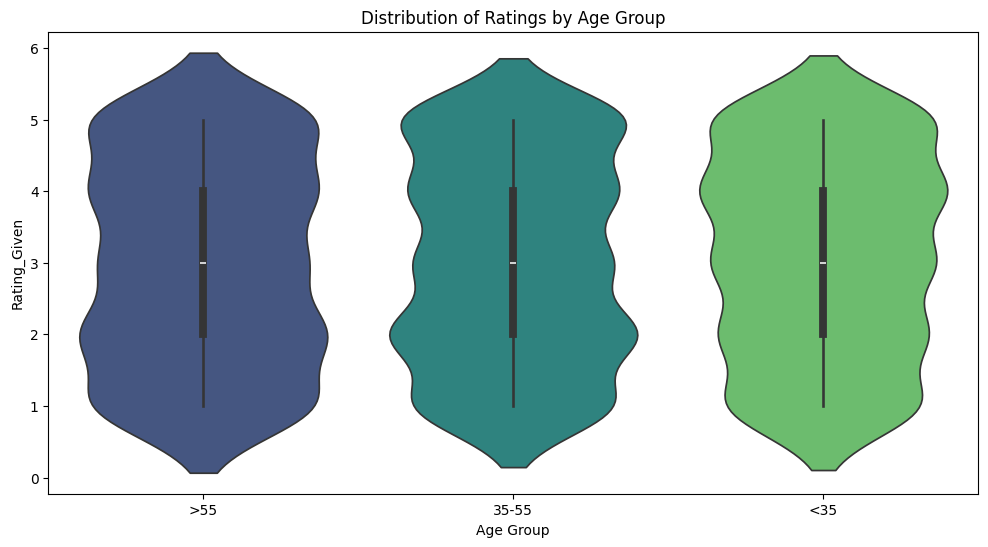

In [140]:
#Age和Rating
def age_group(Age):
    if Age < 35:
        return '<35'
    elif 35 <= Age <= 55:
        return '35-55'
    else:
        return '>55'
    
df['age_group'] = df['Age'].apply(age_group)

plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='Rating_Given', data=df, palette='viridis')
plt.title('Distribution of Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating_Given')
plt.show()

#no correlation between age and rating.


C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3283997491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Favorite_Genre', y='Rating_Given', data=df, palette='viridis')


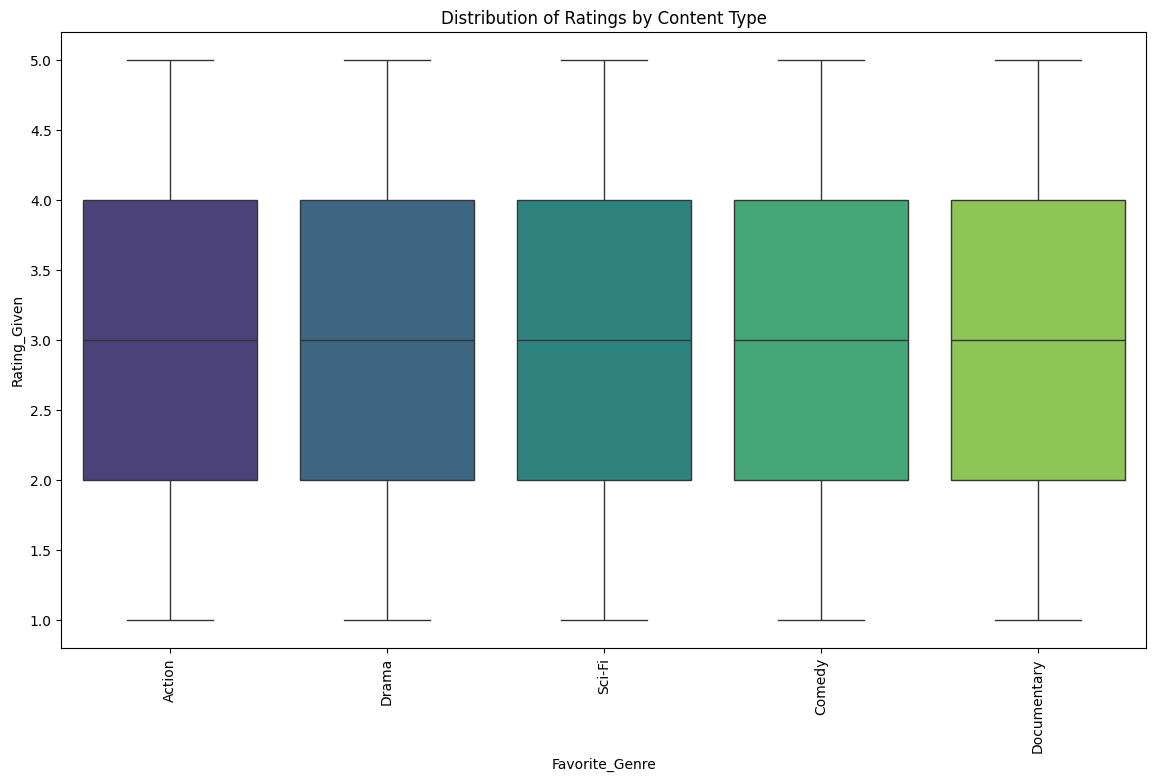

In [141]:
#Content Type和Rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='Favorite_Genre', y='Rating_Given', data=df, palette='viridis')
plt.title('Distribution of Ratings by Content Type')
plt.xlabel('Favorite_Genre')
plt.ylabel('Rating_Given')
plt.xticks(rotation=90)
plt.show()
#no correlation between content type and rating

In [142]:
#2.Gender aspect
gender_counts = df['Gender'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100
print(gender_percentage)
#The gender distribution is relatively even.

Gender
Other     33.6
Male      33.4
Female    33.0
Name: count, dtype: float64


C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3161751710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Monthly_Hours_Watched', data=df, palette='viridis')


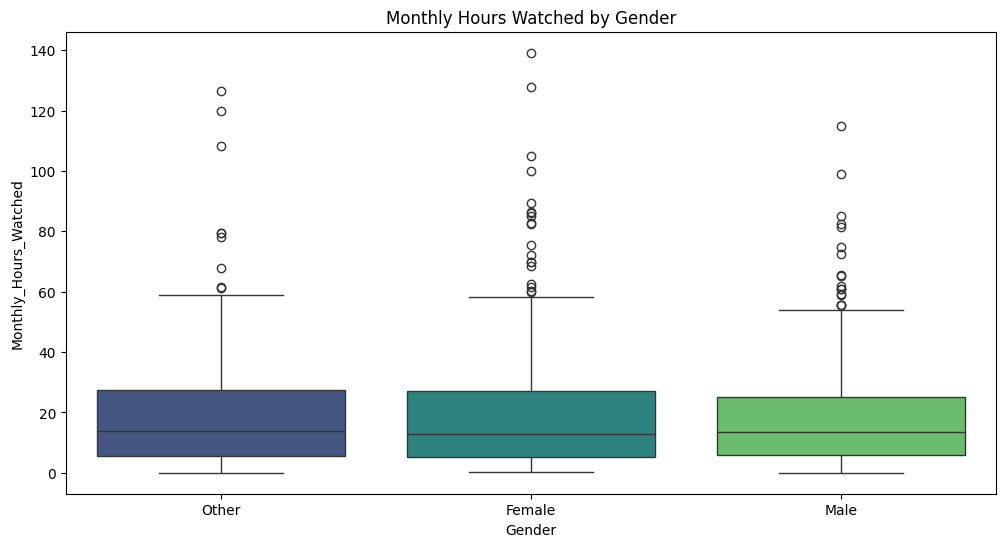

In [143]:
#Box plot of gender and watching time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Monthly_Hours_Watched', data=df, palette='viridis')
plt.title('Monthly Hours Watched by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly_Hours_Watched')
plt.show()
#There is no significant difference in monthly watching time among genders

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3285482087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Rating_Given', data=df, palette='viridis')


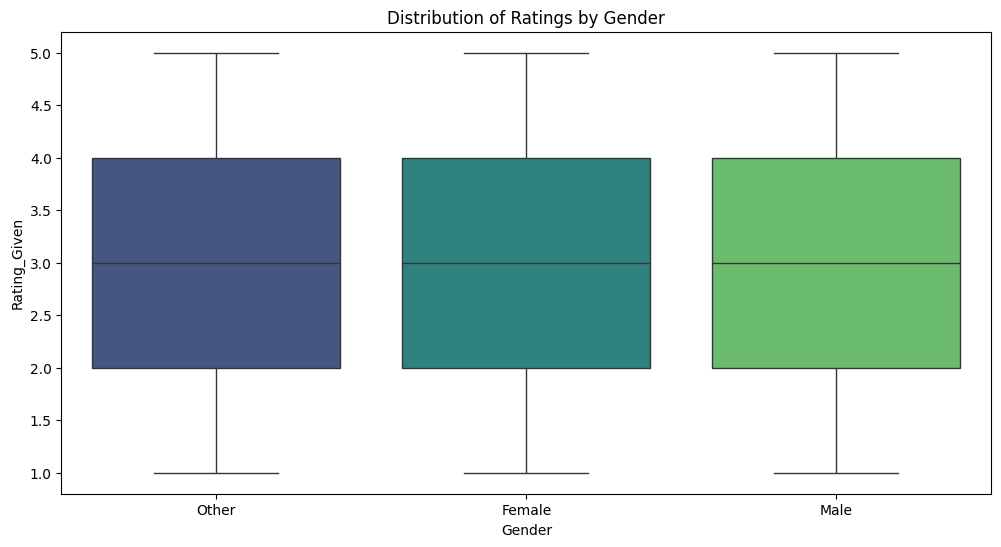

In [144]:
#Gender and Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Rating_Given', data=df, palette='viridis')
plt.title('Distribution of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating_Given')
plt.show()
#There is not much difference in scores between different genders

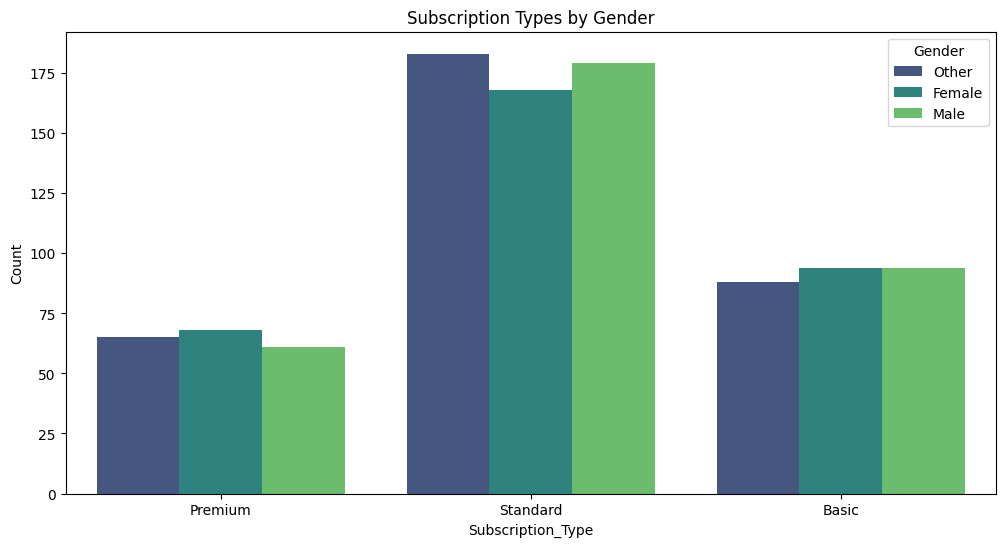

In [145]:
#Gender and subscription type
plt.figure(figsize=(12, 6))
sns.countplot(x='Subscription_Type', hue='Gender', data=df, palette='viridis')
plt.title('Subscription Types by Gender')
plt.xlabel('Subscription_Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#There is little difference in subscription types between genders

In [146]:
# Calculate the total number of users for each gender
gender_total_counts = df['Gender'].value_counts()
    
    # Count the number of unsubscribed users for each gender
gender_churned_counts = df[df['Churned'] == 1]['Gender'].value_counts()
    
    # Calculate the unsubscribe rate for each gender
gender_churned_rate = (gender_churned_counts / gender_total_counts) * 100

print(gender_churned_rate)

#The unsubscription rate is higher among women. Pay attention to the types of content women like.

Gender
Female    25.757576
Male      22.455090
Other     25.595238
Name: count, dtype: float64


C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\1826691479.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite_Genre', y='count', data=female_content_type_df, palette='viridis')


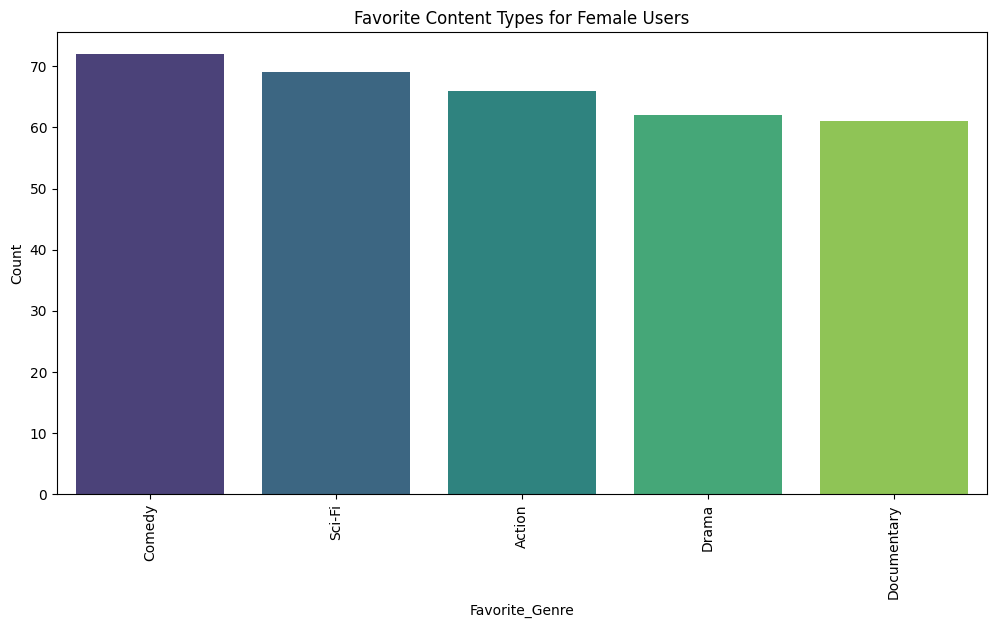

In [147]:
 # Look at the types of content women like
 
female_df = df[df['Gender'] == 'Female']
    

female_content_type_counts = female_df['Favorite_Genre'].value_counts()
    
    

female_content_type_df = pd.DataFrame({'count': female_content_type_counts}).reset_index()
female_content_type_df.columns = ['Favorite_Genre', 'count']
    

plt.figure(figsize=(12, 6))
sns.barplot(x='Favorite_Genre', y='count', data=female_content_type_df, palette='viridis')
plt.title('Favorite Content Types for Female Users')
plt.xlabel('Favorite_Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Women tend to like comedy more

In [148]:
#Location aspect
location_counts = df['Location'].value_counts()
location_percentage = (location_counts / location_counts.sum()) * 100
location_df = pd.DataFrame({'count': location_counts, 'percentage': location_percentage})
print(location_df)
#Average distribution of users at the regional level

          count  percentage
Location                   
West        216        21.6
North       204        20.4
Central     201        20.1
East        200        20.0
South       179        17.9


C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3684466220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Monthly_Hours_Watched', data=df, palette='viridis')


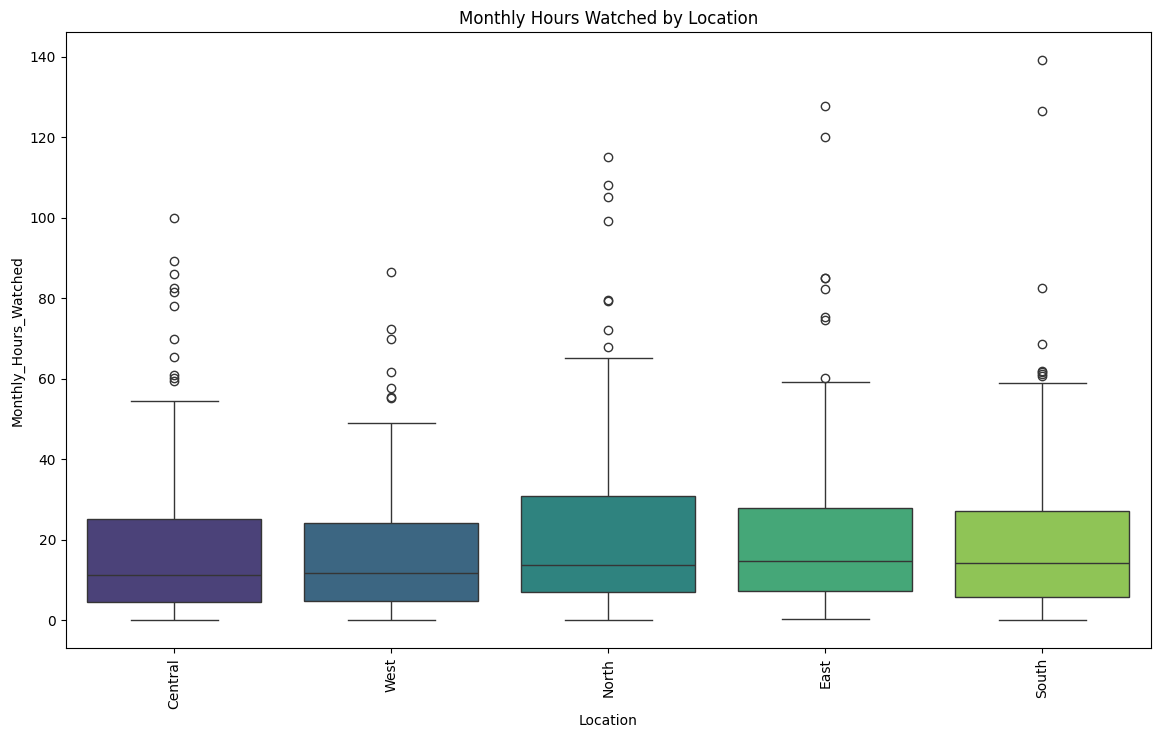

In [149]:
#Box plot of movie viewing time of people in different regions
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Monthly_Hours_Watched', data=df, palette='viridis')
plt.title('Monthly Hours Watched by Location')
plt.xlabel('Location')
plt.ylabel('Monthly_Hours_Watched')
plt.xticks(rotation=90)
plt.show()
#People in North spend more time watching 

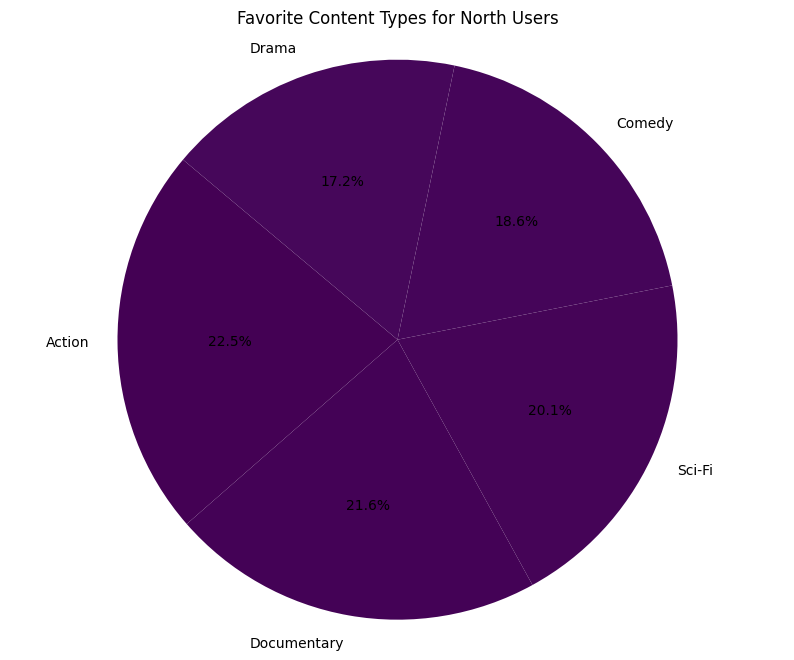

In [150]:
#The type of content people in North like
north_df = df[df['Location'] == 'North']
north_content_type_counts = north_df['Favorite_Genre'].value_counts()
    

north_content_type_df = pd.DataFrame({'count': north_content_type_counts}).reset_index()
north_content_type_df.columns = ['Favorite_Genre', 'count']
    

plt.figure(figsize=(10, 8))
plt.pie(north_content_type_df['count'], labels=north_content_type_df['Favorite_Genre'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(north_content_type_df))))
plt.title('Favorite Content Types for North Users')
plt.axis('equal')  
plt.show()

#People in the North area like Action more

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\198201101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Rating_Given', data=df, palette='viridis')


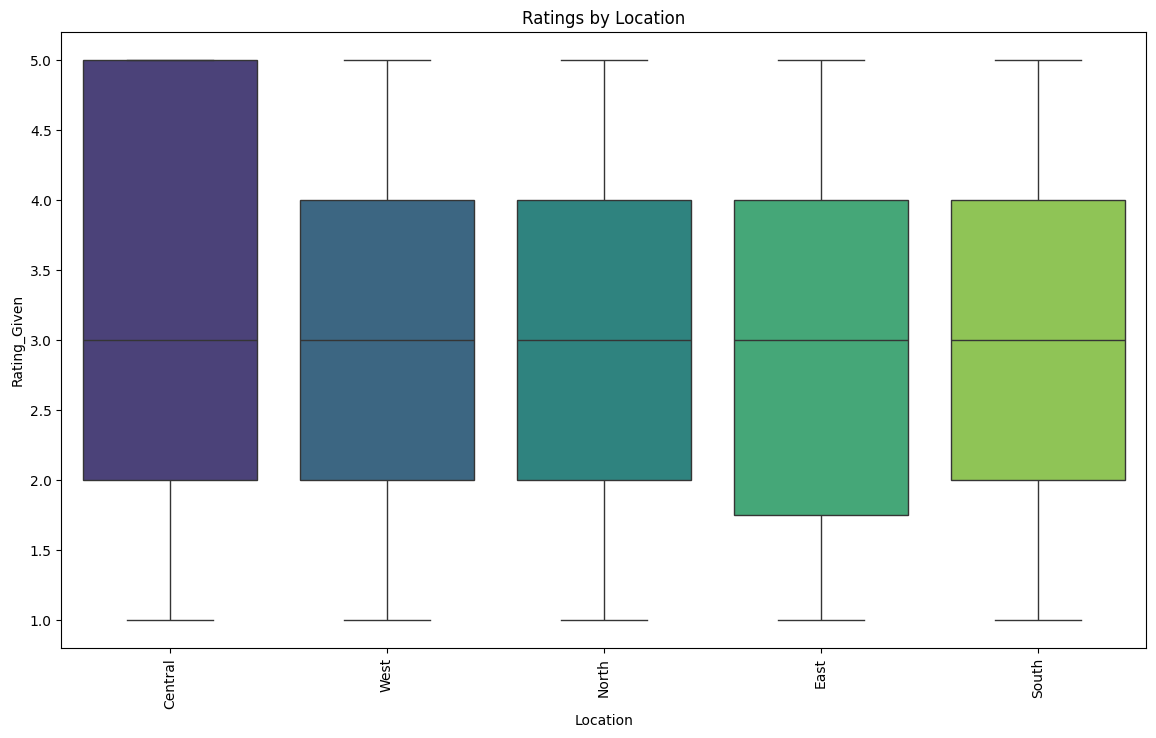

In [151]:
#The relationship between people from different regions and rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rating_Given', data=df, palette='viridis')
plt.title('Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Rating_Given')
plt.xticks(rotation=90)
plt.show()
#People in the central region give higher ratings. Pay attention to what types of content people in the central region like.

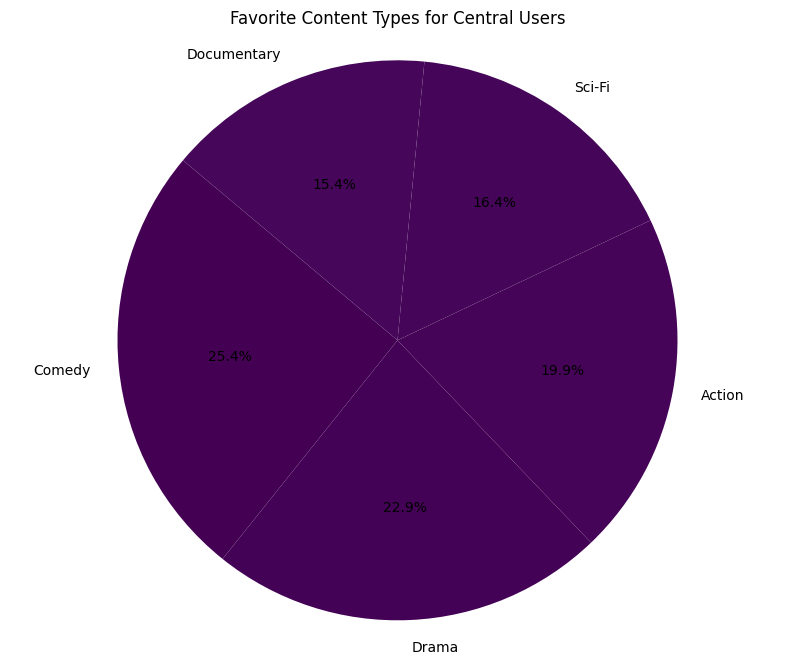

In [152]:
#The type of content people in the central region like
central_df = df[df['Location'] == 'Central']
    

central_content_type_counts = central_df['Favorite_Genre'].value_counts()
    

central_content_type_df = pd.DataFrame({'count': central_content_type_counts}).reset_index()
central_content_type_df.columns = ['Favorite_Genre', 'count']

plt.figure(figsize=(10, 8))
plt.pie(central_content_type_df['count'], labels=central_content_type_df['Favorite_Genre'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(central_content_type_df))))
plt.title('Favorite Content Types for Central Users')
plt.axis('equal') 
plt.show()
#People in the central region tend to like comedy and drama.

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\236479876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Devices_Used', y='Average_Session_Length', data=df, palette='viridis')


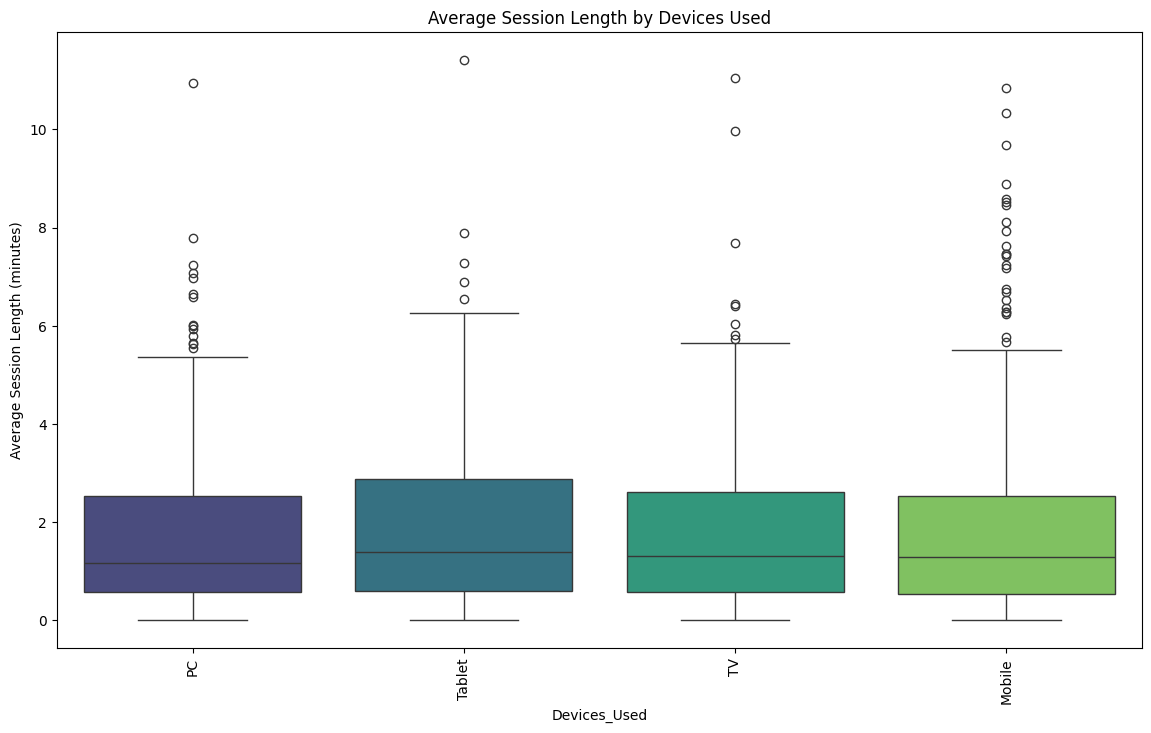

In [153]:
 #Device usage versus session length
plt.figure(figsize=(14, 8))
sns.boxplot(x='Devices_Used', y='Average_Session_Length', data=df, palette='viridis')
plt.title('Average Session Length by Devices Used')
plt.xlabel('Devices_Used')
plt.ylabel('Average Session Length (minutes)')
plt.xticks(rotation=90)
plt.show()

#There are many users using tablet 

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\4226521852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription_Type', y='Monthly_Hours_Watched', data=df, palette='viridis')


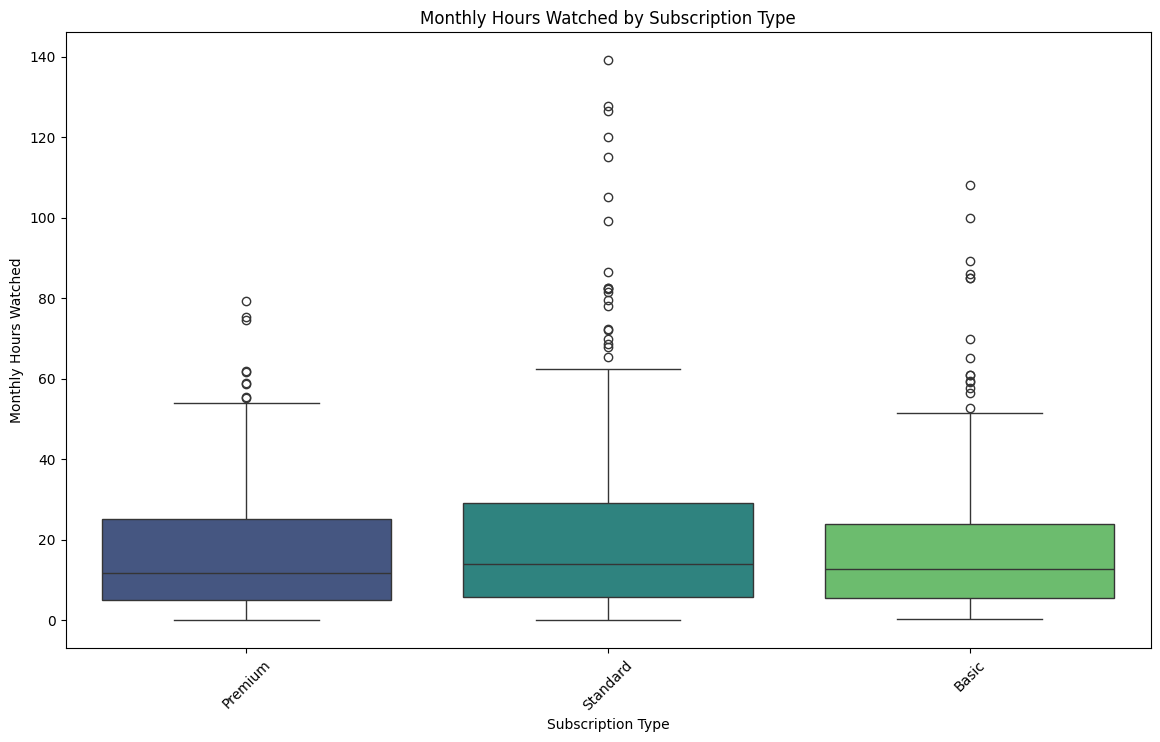

In [154]:
#Subscription type versus monthly watch time
plt.figure(figsize=(14, 8))
sns.boxplot(x='Subscription_Type', y='Monthly_Hours_Watched', data=df, palette='viridis')
plt.title('Monthly Hours Watched by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Hours Watched')
plt.xticks(rotation=45)
plt.show()
#People who subscribe to Standard watch the longest, so keep them

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\2063530741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_monthly_hours_watched', y='Favorite_Genre', data=content_type_avg_watch_time_df, palette='viridis')


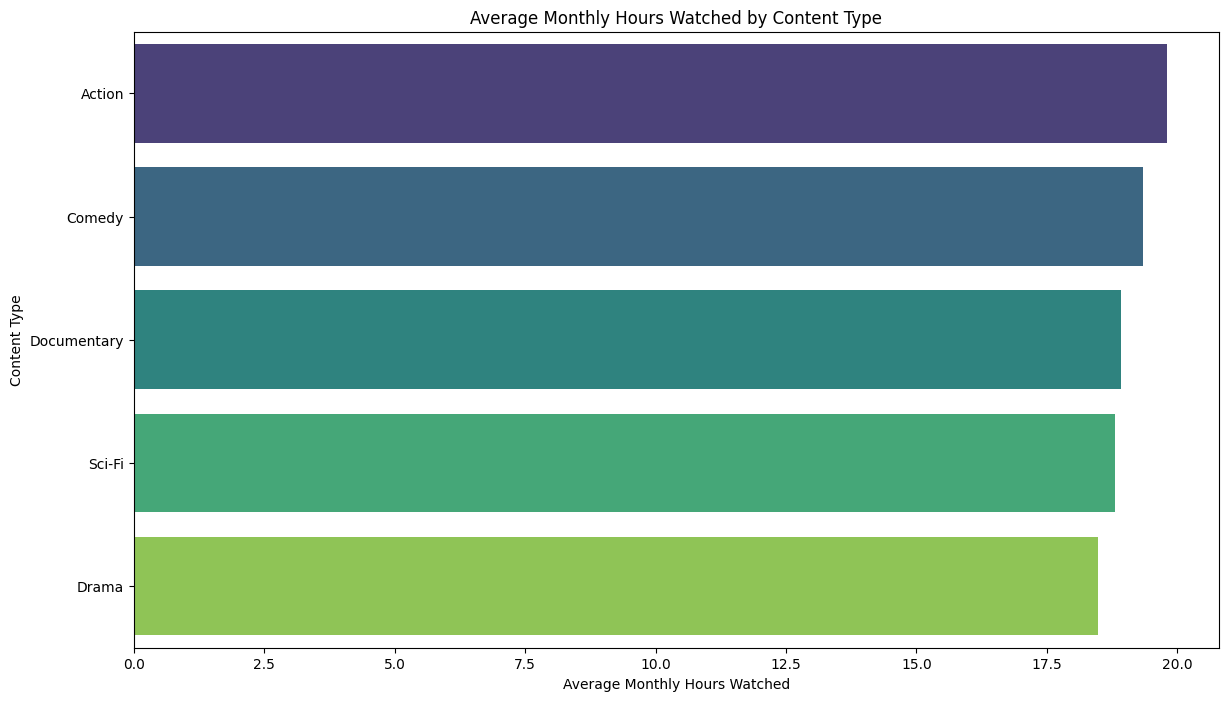

In [155]:
#Sorted by viewing time per content type
content_type_avg_watch_time = df.groupby('Favorite_Genre')['Monthly_Hours_Watched'].mean().sort_values(ascending=False)
    
    

content_type_avg_watch_time_df = content_type_avg_watch_time.reset_index()
content_type_avg_watch_time_df.columns = ['Favorite_Genre', 'average_monthly_hours_watched']
    

plt.figure(figsize=(14, 8))
sns.barplot(x='average_monthly_hours_watched', y='Favorite_Genre', data=content_type_avg_watch_time_df, palette='viridis')
plt.title('Average Monthly Hours Watched by Content Type')
plt.xlabel('Average Monthly Hours Watched')
plt.ylabel('Content Type')
plt.show()

#Actions take the most time to watch

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\1604276953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='Favorite_Genre', data=content_type_avg_rating_df, palette='viridis')


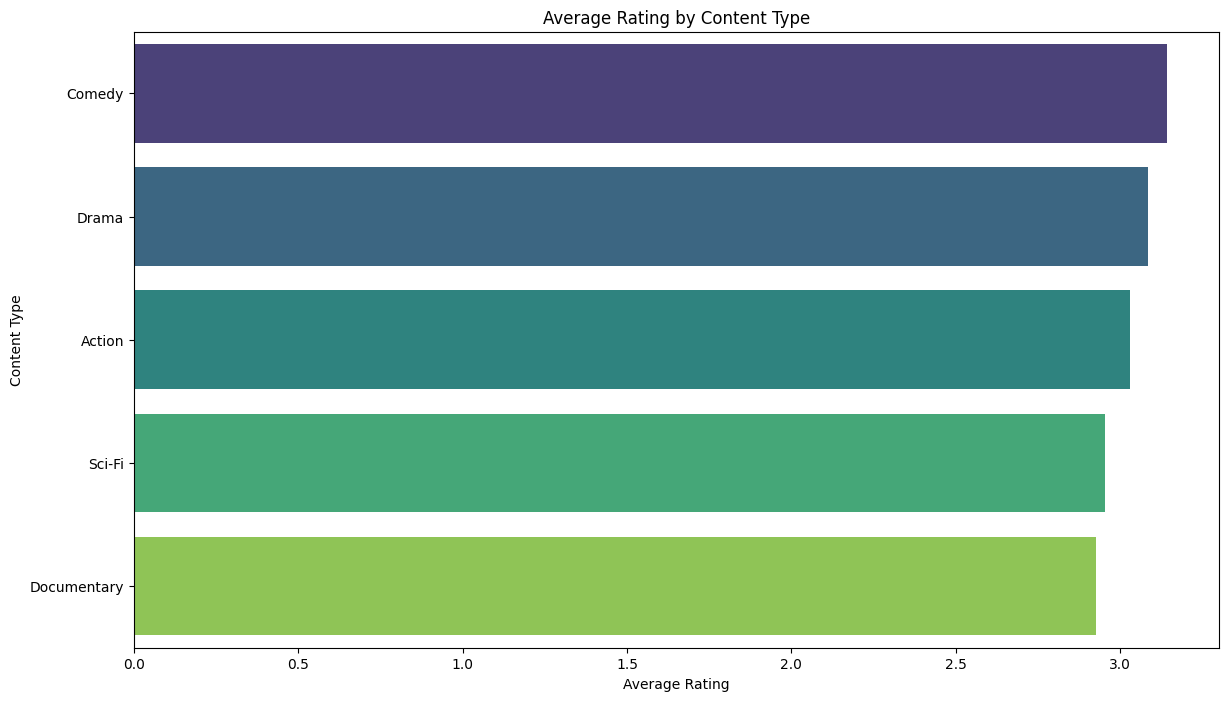

In [156]:
#Which content has a high score?
#Calculate the average of ratings by content type
content_type_avg_rating = df.groupby('Favorite_Genre')['Rating_Given'].mean().sort_values(ascending=False)
    
    

content_type_avg_rating_df = content_type_avg_rating.reset_index()
content_type_avg_rating_df.columns = ['Favorite_Genre', 'average_rating']
    

plt.figure(figsize=(14, 8))
sns.barplot(x='average_rating', y='Favorite_Genre', data=content_type_avg_rating_df, palette='viridis')
plt.title('Average Rating by Content Type')
plt.xlabel('Average Rating')
plt.ylabel('Content Type')
plt.show()
#comedy highest rated

C:\Users\qifan\AppData\Local\Temp\ipykernel_29624\3297675546.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_count', y='Subscription_Type', data=subscription_churn_counts_df, palette='viridis')


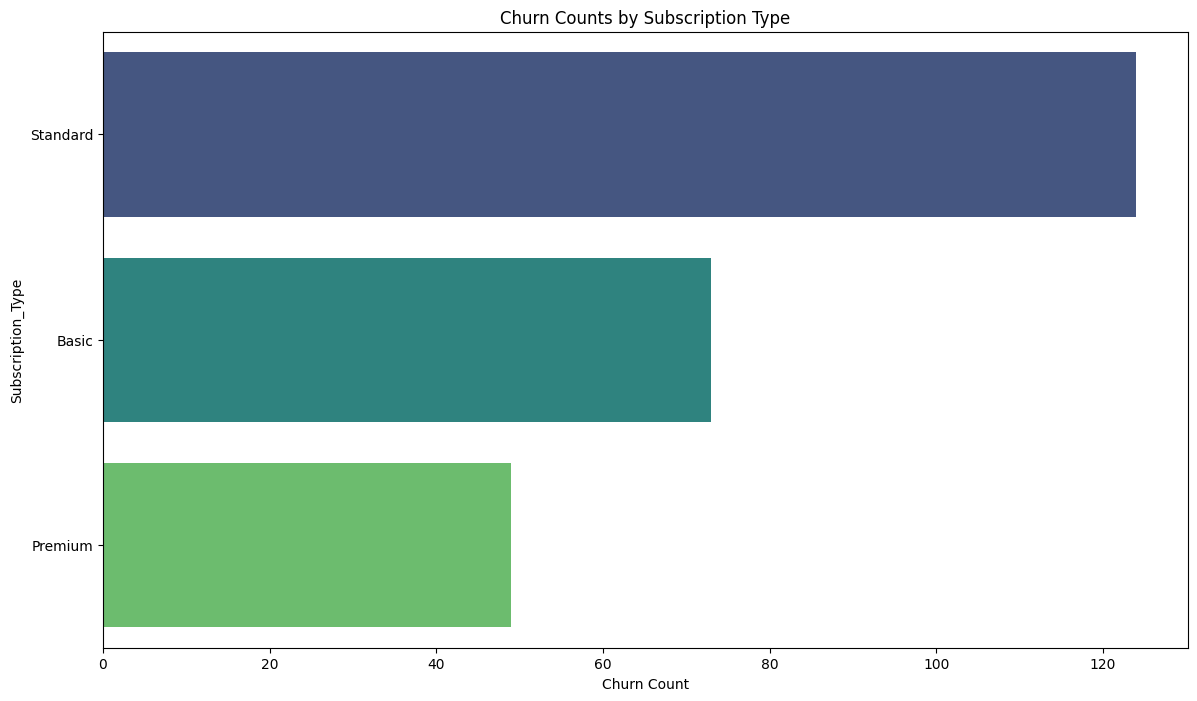

In [157]:
#See which subscription type has the most unsubscribes
churned_df = df[df['Churned'] == 1]
    

subscription_churn_counts = churned_df['Subscription_Type'].value_counts().sort_values(ascending=False)


subscription_churn_counts_df = subscription_churn_counts.reset_index()
subscription_churn_counts_df.columns = ['Subscription_Type', 'churn_count']

plt.figure(figsize=(14, 8))
sns.barplot(x='churn_count', y='Subscription_Type', data=subscription_churn_counts_df, palette='viridis')
plt.title('Churn Counts by Subscription Type')
plt.xlabel('Churn Count')
plt.ylabel('Subscription_Type')
plt.show()

#Standard has the most unsubscribes, think about the strategy

In [158]:
#Assuming that 10% more users over the age of 35 subscribe to the Premium package, how much will revenue increase?

young_users_df = df[df['Age'] < 35]

# Count the number of users under the age of 35 who subscribe to Premium services
premium_young_users = young_users_df[young_users_df['Subscription_Type'] == 'Premium']

premium_young_users_count = premium_young_users.shape[0]

#print(premium_young_users_count)  #56 young people bought premium

current_premium_users = 56
premium_monthly_fee = 19.99

# Calculate current revenue
current_revenue = current_premium_users * premium_monthly_fee
print("Current revenue:", current_revenue)

# Calculate revenue after a 10% increase in subscribers(premium)
new_premium_users = current_premium_users * 1.1
new_revenue = new_premium_users * premium_monthly_fee
print("New revenue:", new_revenue)

# Calculate revenue incresed
revenue_increase = new_revenue - current_revenue
print("Revenue increase:", revenue_increase)

#If the number of young users subscribing to premium increases by 10%, monthly income will increase by US$111.94, 
#and the annual income increase will exceed US$1,000.

Current revenue: 1119.4399999999998
New revenue: 1231.384
Revenue increase: 111.94400000000019


In [159]:
#If standard’s unsubscription rate is reduced by 10%, how much will the monthly income increase?
standard_monthly_fee = 14.99

# Calculate the current number of Standard subscribers
current_standard_users = df[df['Subscription_Type'] == 'Standard'].shape[0]

# Calculate the unsubscription rate of current Standard subscriber users
current_standard_churned = df[(df['Subscription_Type'] == 'Standard') & (df['Churned'] == 1)].shape[0]

# Calculate monthly revenue for current Standard subscription
current_standard_revenue = (current_standard_users - current_standard_churned) * standard_monthly_fee

# Assume a 10% reduction in Standard unsubscriptions
reduced_churned_standard_users = current_standard_churned * 0.9

# Calculate the number of retained users after a 10% reduction in unsubscriptions
new_standard_users = current_standard_users - (current_standard_churned - reduced_churned_standard_users)

# Calculate new monthly revenue after 10% reduction in unsubscription
new_standard_revenue = new_standard_users * standard_monthly_fee

# Calculate revenue increase
revenue_increase = new_standard_revenue - current_standard_revenue

print(f"Current Standard users: {current_standard_users}")
print(f"Current Standard churned users: {current_standard_churned}")
print(f"Current Standard revenue: ${current_standard_revenue:.2f}")
print(f"New Standard users after 10% reduction in churn: {new_standard_users:.0f}")
print(f"New Standard revenue: ${new_standard_revenue:.2f}")
print(f"Revenue increase: ${revenue_increase:.2f}")

#If the number of standerd unsubscribers decreases by 10%, revenue will increase by 1672.88

Current Standard users: 530
Current Standard churned users: 124
Current Standard revenue: $6085.94
New Standard users after 10% reduction in churn: 518
New Standard revenue: $7758.82
Revenue increase: $1672.88
